### Overview

Understanding salary structures within Texas state government involves analyzing various factors, including job titles, demographics, and employment status. Resources like the Texas Tribune's Government Salaries Explorer and the State Auditor's Compensation and Classification System offer valuable data and frameworks for such analyses. Predictive modeling efforts, such as the "ML_TexasSalaryPred" project, further enhance the ability to estimate and manage payroll information effectively.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import math 

### Importing Dataset

In [2]:
df=pd.read_csv("salary.csv")

In [3]:
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
df.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [7]:
df.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [9]:
df.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [10]:
df.shape

(149481, 21)

In [11]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

### renaming the column name for standardisation

In [12]:
df.rename({'AGENCY NAME': 'AGENCY_NAME', 'CLASS CODE': 'CLASS_CODE','CLASS TITLE':'CLASS_TITLE','EMPLOY DATE':'EMPLOY_DATE','HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK','STATE NUMBER':'STATE_NUMBER'}, axis=1,inplace=True)

### Understanding Feartures Names

1.Agency:Unique Agency code number.An agency is a business, firm, or organization that provides a specific service.

2.Agency Name:Name of the Agency.

3.Last Name:Last name of the employee.(otherwise known as surnames)these are the names passed down from generation to generation.

4.First Name:The first name is the name given at birth of the employee.

5.MI:A person may be given a middle name regardless of whether it's necessary to distinguish them from other people with the same given name and surname.

6.Class Code:A class code is a three or four digit numerical code assigned by NCCI or a State Rating Bureau. Class codes are assigned to differentiate between the various job duties or scope of work performed by employees. NCCI's classification system contains nearly 800 unique class codes and is the basis for both pricing and underwriting workers' compensation insurance rates. NCCI is the abbreviation for the National Council on Compensation Insurance. They provide statistical data to insurance companies and states.

7.Class Title:Class title is the name of the position or job held by a service person.

8.Ethniticity:The fact or state of belonging to a social group that has a common national or cultural tradition.

* WHITE term refers to white Americans
* HISPANIC term refers to a person of Cuban, Mexican, Puerto Rican, South or Central American, or other Spanish culture or  origin.
* BLACK term refers to African Americans.
* AM INDIAN term refers to a person of india.
* ASIAN term refrs to a person of Cambodia, China, Japan, Korea, Malaysia, Pakistan and all the other asian countries.
* OTHER term refers to a person of all the other countries except the above mentioned.

9.Gender:Gender is used to describe the characteristics of women and men that are socially constructed

10.Status-  Types-
* URP - UNCLASSIFIED REGULAR PART-TIME
* CTP - CLASSIFIED TEMPORARY PART-TIME
* CRF - CLASSIFIED REGULAR FULL-TIME
* ERP - EXEMPT REGULAR PART-TIME
* CRP - CLASSIFIED REGULAR PART-TIME
* URF - UNCLASSIFIED REGULAR FULL-TIME
* CTP - CLASSIFIED TEMPORARY FULL-TIME
* UTF - UNCLASSIFIED TEMPORARY FULL-TIME
* UTP - UNCLASSIFIED TEMPORARY PART-TIME
* ERF - EXEMPT REGULAR FULL-TIME
* CTF - CLASSIFIED TEMPORARY FULL-TIME

11.Employ Date:The official day and date that a person officially starts their form of employment or job.

12.HRLY RATE:The amount of money that you receive for each hour you work.

13.HRS PER WK:The number of hours the employee works per week.

14.MONTHLY:The amount of money that you receive for each month you work.

15.ANNUAL: The amount of money that you receive for each year you work.

16.STATE NUMBER:6 Digit number assigned to states of INDIA.

17.duplicated:Duplicated means that the data is repeated in the dataset.

18.multiple_full_time_jobs:More than one full time jobs.

19.combined_multiple_jobs:More than one part time jobs

20.summed_annual_salary:Total amount of money earned in a calendar year before taxes. It is the sum of all income perceived by an individual in that 12-month period.

21.hide_from_search:User can hide dataset fields that are not typically used for visualizations to prevent unintended bias in BI and analytics, or even to obscure confidential data.

In [13]:
df.apply(pd.unique)

AGENCY                     [241, 212, 696, 302, 601, 510, 520, 537, 530, ...
AGENCY_NAME                [COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SEC...
LAST NAME                  [RUCKER                        , SPECIA JR    ...
FIRST NAME                 [MORTON                        , JOHN         ...
MI                         [V, J,  , D, A, C, M, R, T, F, P, G, L, K, E, ...
CLASS_CODE                 [JD25    , 3524    , 4504    , 1623    , 1984 ...
CLASS_TITLE                [JUDGE, RETIRED                               ...
ETHNICITY                  [WHITE          , HISPANIC       , BLACK      ...
GENDER                                    [MALE           , FEMALE         ]
STATUS                     [URP - UNCLASSIFIED REGULAR PART-TIME    , CTP...
EMPLOY_DATE                [02/18/88, 02/01/15, 02/01/20, 09/01/18, 06/29...
HRLY_RATE                  [75.9615, 81.04454, 81.04453000000001, 0.0, 49...
HRS_PER_WK                 [29.0, 4.0, 40.0, 20.0, 16.0, 19.0, 7.0, 41.0,...

In [14]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts(), "\n")

Value counts for column: AGENCY
AGENCY
529    36667
696    35926
601    13099
530    12588
405    10097
       ...  
364        7
481        5
213        4
464        4
510        1
Name: count, Length: 113, dtype: int64 

Value counts for column: AGENCY_NAME
AGENCY_NAME
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: count, Length: 113, dtype: int64 

Value counts for column: LA

In [15]:
new_data=df[['AGENCY_NAME','CLASS_TITLE','ETHNICITY','GENDER','STATUS','HRLY_RATE','HRS_PER_WK','MONTHLY','STATE_NUMBER']]
new_data

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE_NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,127717
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,59115
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,165030
...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,2899.00,770781
149477,STATE PRESERVATION BOARD ...,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5500.00,847431
149478,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,34266
149479,STATE PRESERVATION BOARD ...,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5744.16,123490


### Exploratry Data Analysis

### Univariate Analysis

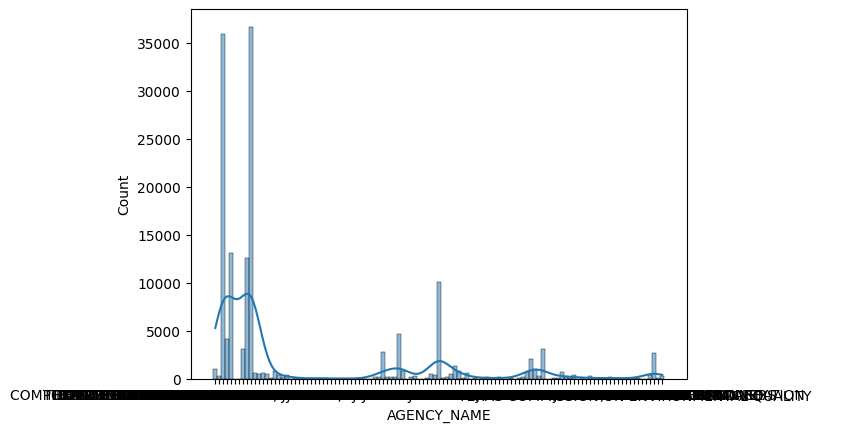

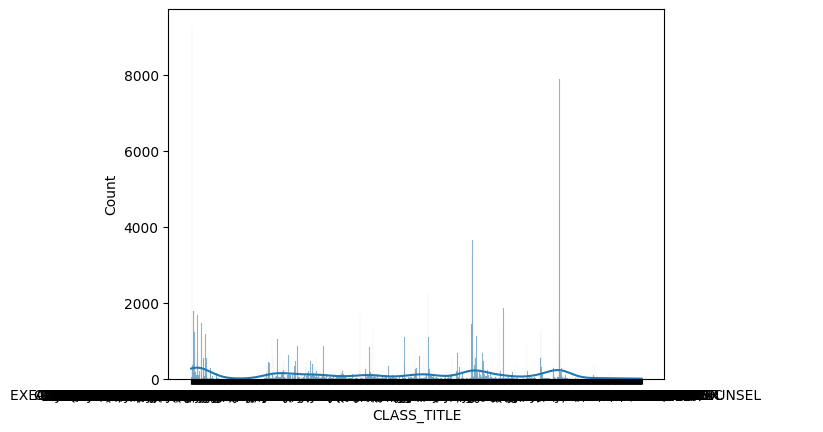

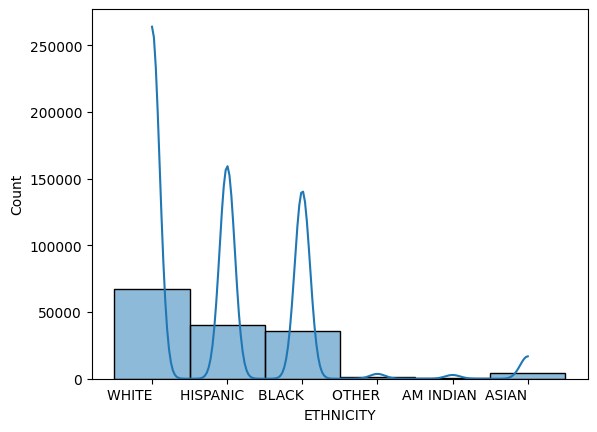

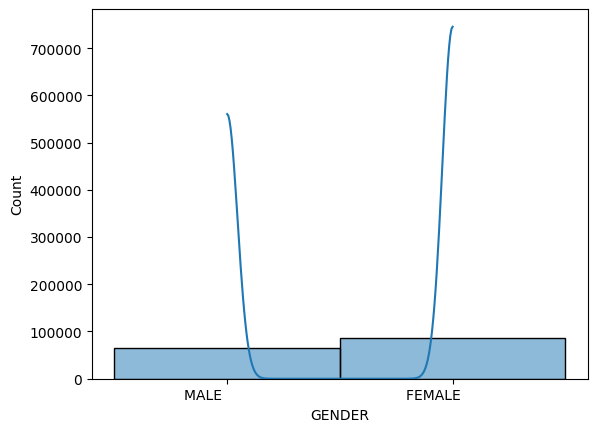

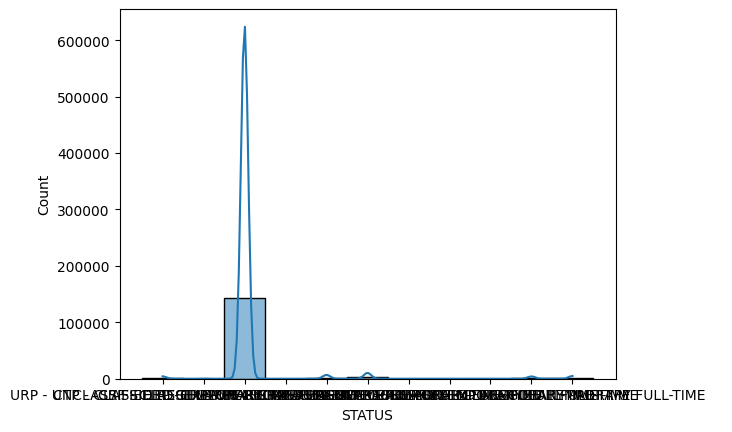

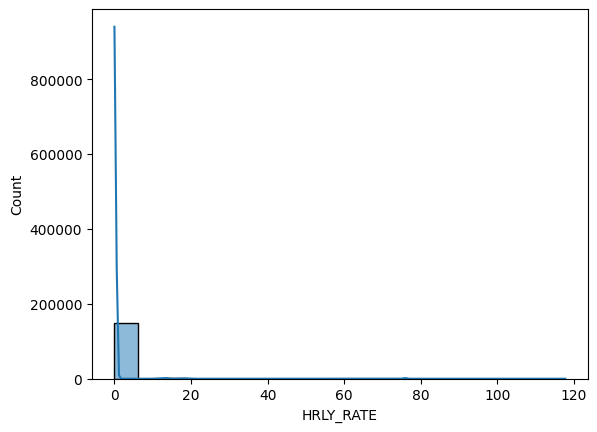

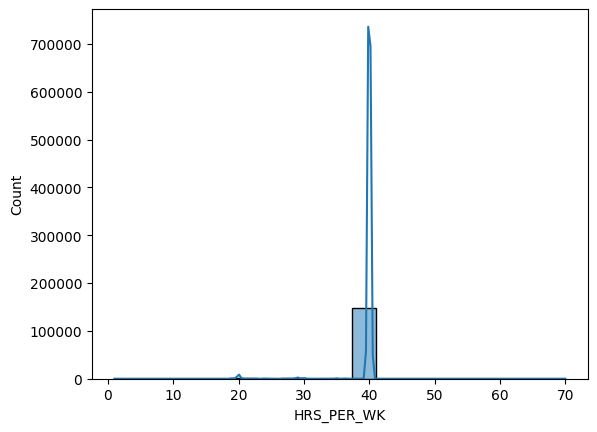

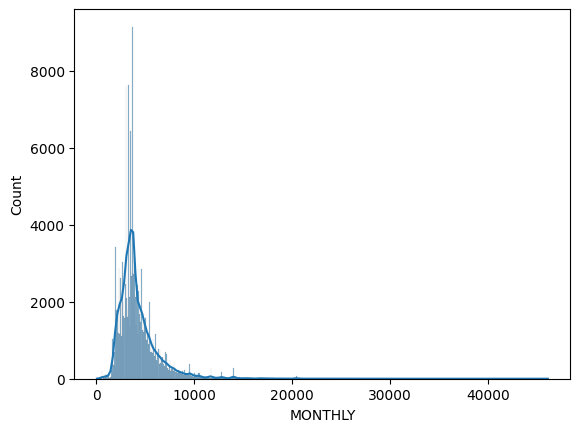

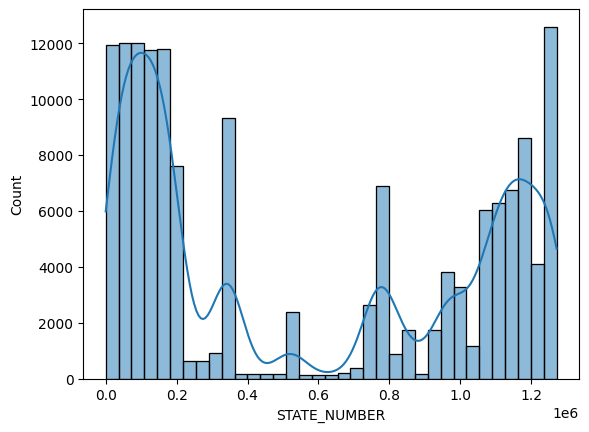

In [16]:
for columns in new_data:
  sns.histplot(x=columns, data=new_data,kde=True)
  plt.show() 

STATE_NUMBER-The distribution appears to be bimodal or multimodal, as there are multiple peaks.
There is no clear symmetry, meaning it is not normally distributed.

MONTHLY-he distribution shown in the histogram is right-skewed (positively skewed).

STATUS-A single sharp spike suggests that one category dominates the data.Small bars on both sides indicate some other categories, but their frequencies are much lower.

CLASS_TITLE-The plot appears to be highly skewed and possibly categorical in nature rather than a normal distribution.

HRS_PER_WK-This distribution appears to be highly concentrated around a single value (40 hours per week), making it not normal and instead a peaked or imbalanced distribution

HRLY_RATE-The distribution of hourly rates is definitely right-skewed.the majority of people earn lower hourly rates, while higher rates are much less common.

GENDER-This suggests a right-skewed distribution.

AGENCY_NAME-Appear to be highly skewed. Agency data shows a left skew (negatively skewed), where a few agencies have significantly high counts, while most others have much lower counts.

ETHNICITY-Appears to be right-skewed

#### ANNUAL

<Axes: xlabel='ANNUAL'>

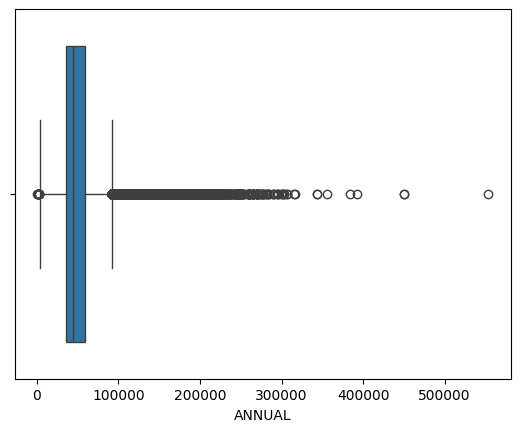

In [17]:
sns.boxplot(x='ANNUAL',data=df)

#### Removing Outlier 

In [18]:
from scipy import stats
IQR= stats.iqr(df.ANNUAL,interpolation='midpoint')
IQR

22151.64

In [19]:
Q1= df.ANNUAL.quantile(0.25)
Q3= df.ANNUAL.quantile(0.75)
print("Q1  :",Q1)
print("Q3  :",Q3)
low_limit= Q1- 1.5*IQR
upp_limit= Q3+ 1.5*IQR
print("low_limit :",low_limit)
print("upper_limit :",upp_limit)

Q1  : 36238.08
Q3  : 58389.72
low_limit : 3010.6200000000026
upper_limit : 91617.18


In [20]:
lower=df.loc[df['ANNUAL']<low_limit]
lower

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
141901,102,HOUSE OF REPRESENTATIVES ...,CUTBIRTH,JOE,H,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,931560,NaN,NaN,NaN,NaN,NaN
142033,102,HOUSE OF REPRESENTATIVES ...,HARRIS,KATHARINE,T,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,250.00,3000.00,1247654,NaN,NaN,NaN,NaN,NaN
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,50.00,600.00,851628,NaN,NaN,NaN,NaN,NaN
142114,102,HOUSE OF REPRESENTATIVES ...,KOENIG,REID,A,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,336571,NaN,NaN,NaN,NaN,NaN
142205,102,HOUSE OF REPRESENTATIVES ...,MITCHELL,JESSICA,B,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,4.0,210.12,2521.44,775718,NaN,NaN,NaN,NaN,NaN


In [21]:
upper=df.loc[df['ANNUAL']>upp_limit]
upper

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
36,101,SENATE ...,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,8000.00,96000.00,49800,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


In [22]:
df=pd.concat([lower,upper])
df

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


### Bivariate Analysis

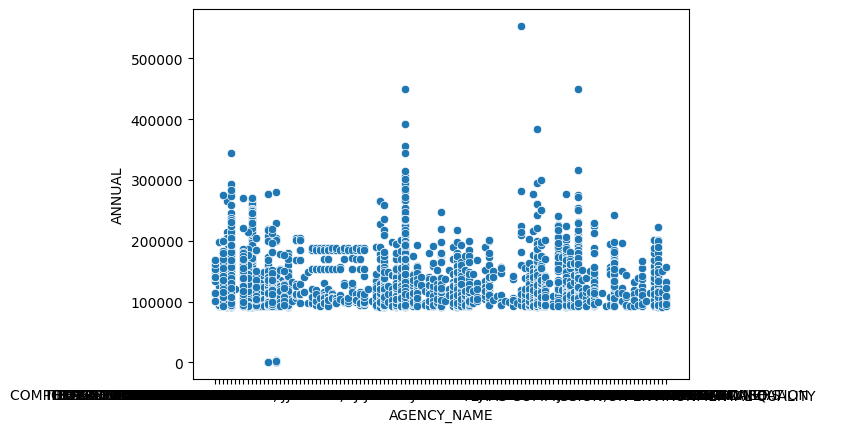

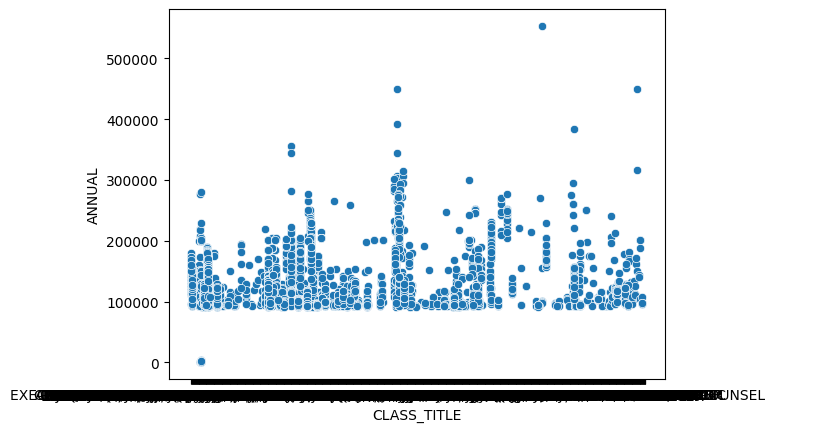

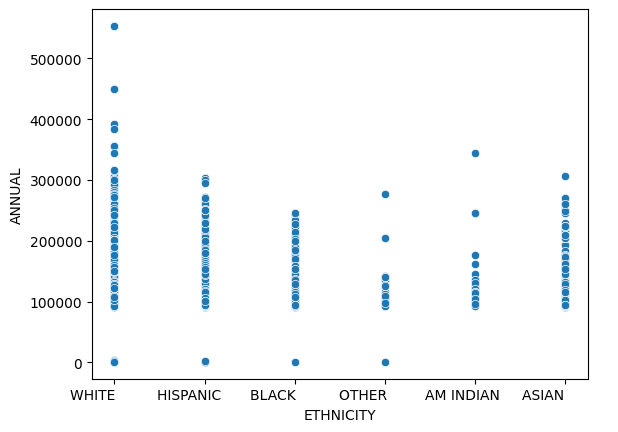

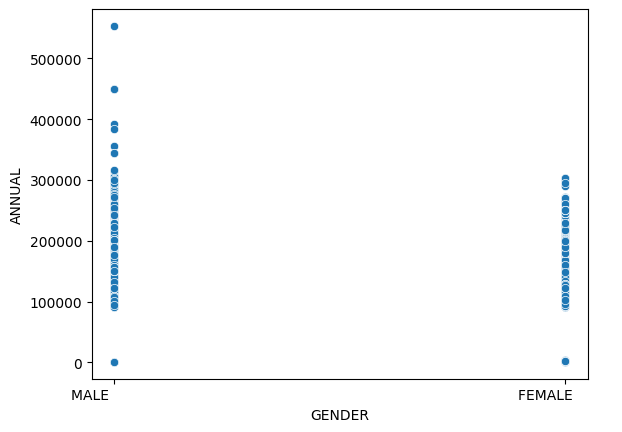

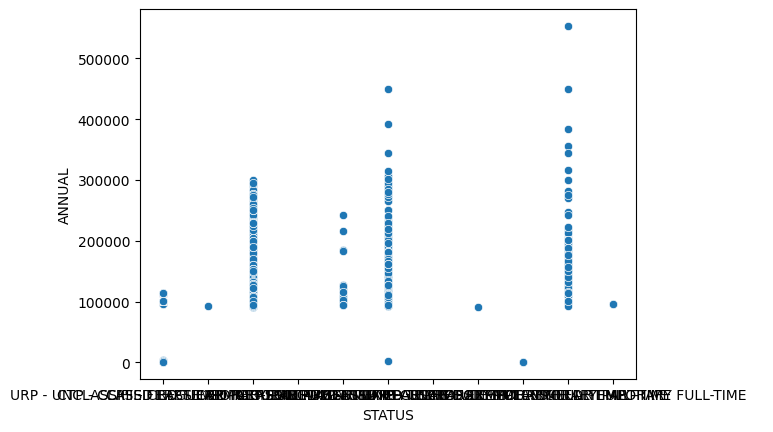

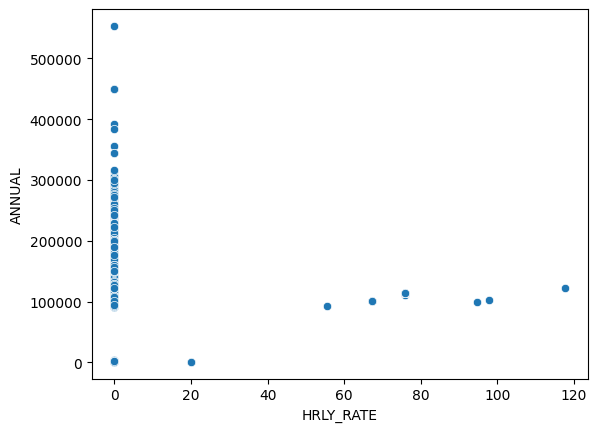

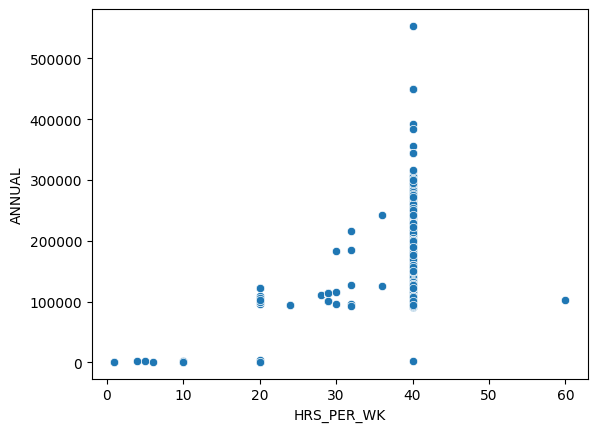

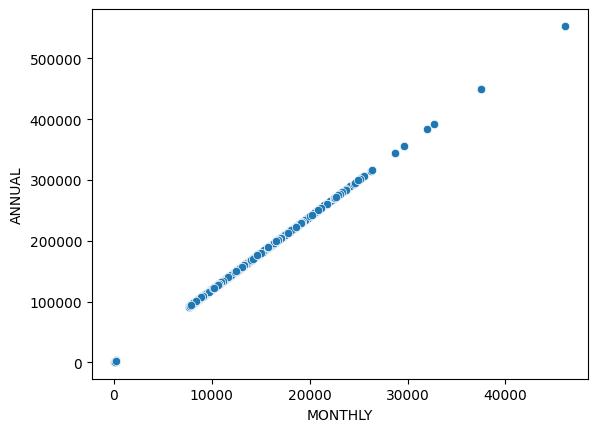

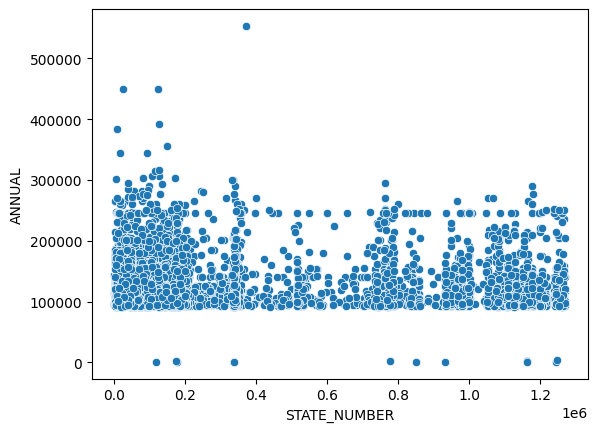

In [23]:
for columns in new_data:
     sns.scatterplot(x=columns,y=df.ANNUAL,data=new_data)
     plt.show()
    

STATE_NUMBER-Annual values differ widely across states.

MONTHLY-"ANNUAL" is a positive linear correlation.

HRS_PER_WK- The hours per week  increases, the "ANNUAL" (annual income)  also increasing trend. However, the relationship isn't perfectly linear.

HRLY_RATE-This is a logical relationship because an increase in hourly rates typically corresponds to higher annual earnings.

STATUS-"FULL-TIME" category has the highest concentration of increased annual values, suggesting that people with "FULL-TIME" status generally earn higher annual salaries.

GENDER-Males might show a slightly wider range of annual incomes.

ETHNICITY-Highest annual values) stands out in the "FULL-TIME" status.

CLASS_TITLE-Categories with higher annual incomes are likely linked to roles that generally require more specialization or seniority, such as managerial, executive, or technical positions.Categories with lower annual incomes might correspond to entry-level, part-time, or support roles.

### Multivariate Analysis

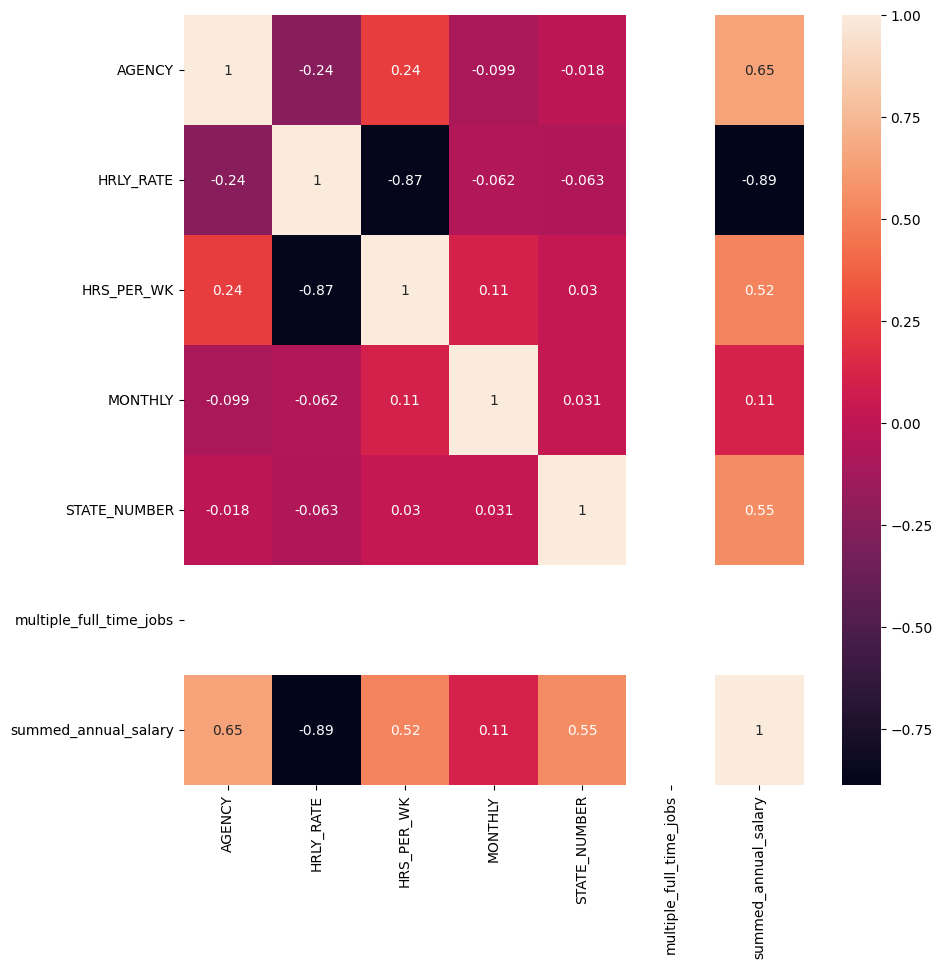

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.drop(columns=['ANNUAL']).select_dtypes(include=['number'])  # Keep only numeric columns
plt.figure(figsize=(10, 10), facecolor='white')
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


hrs_per_wk and hrly_rate have a negative correlation (-0.34) → as one increases, the other decreases.

monthly and annual have a strong positive correlation (1.00) → they are directly proportional.

### Pairplot

In [25]:
data1= df[['AGENCY','HRLY_RATE','HRS_PER_WK','MONTHLY','STATE_NUMBER','multiple_full_time_jobs','summed_annual_salary','ANNUAL']]

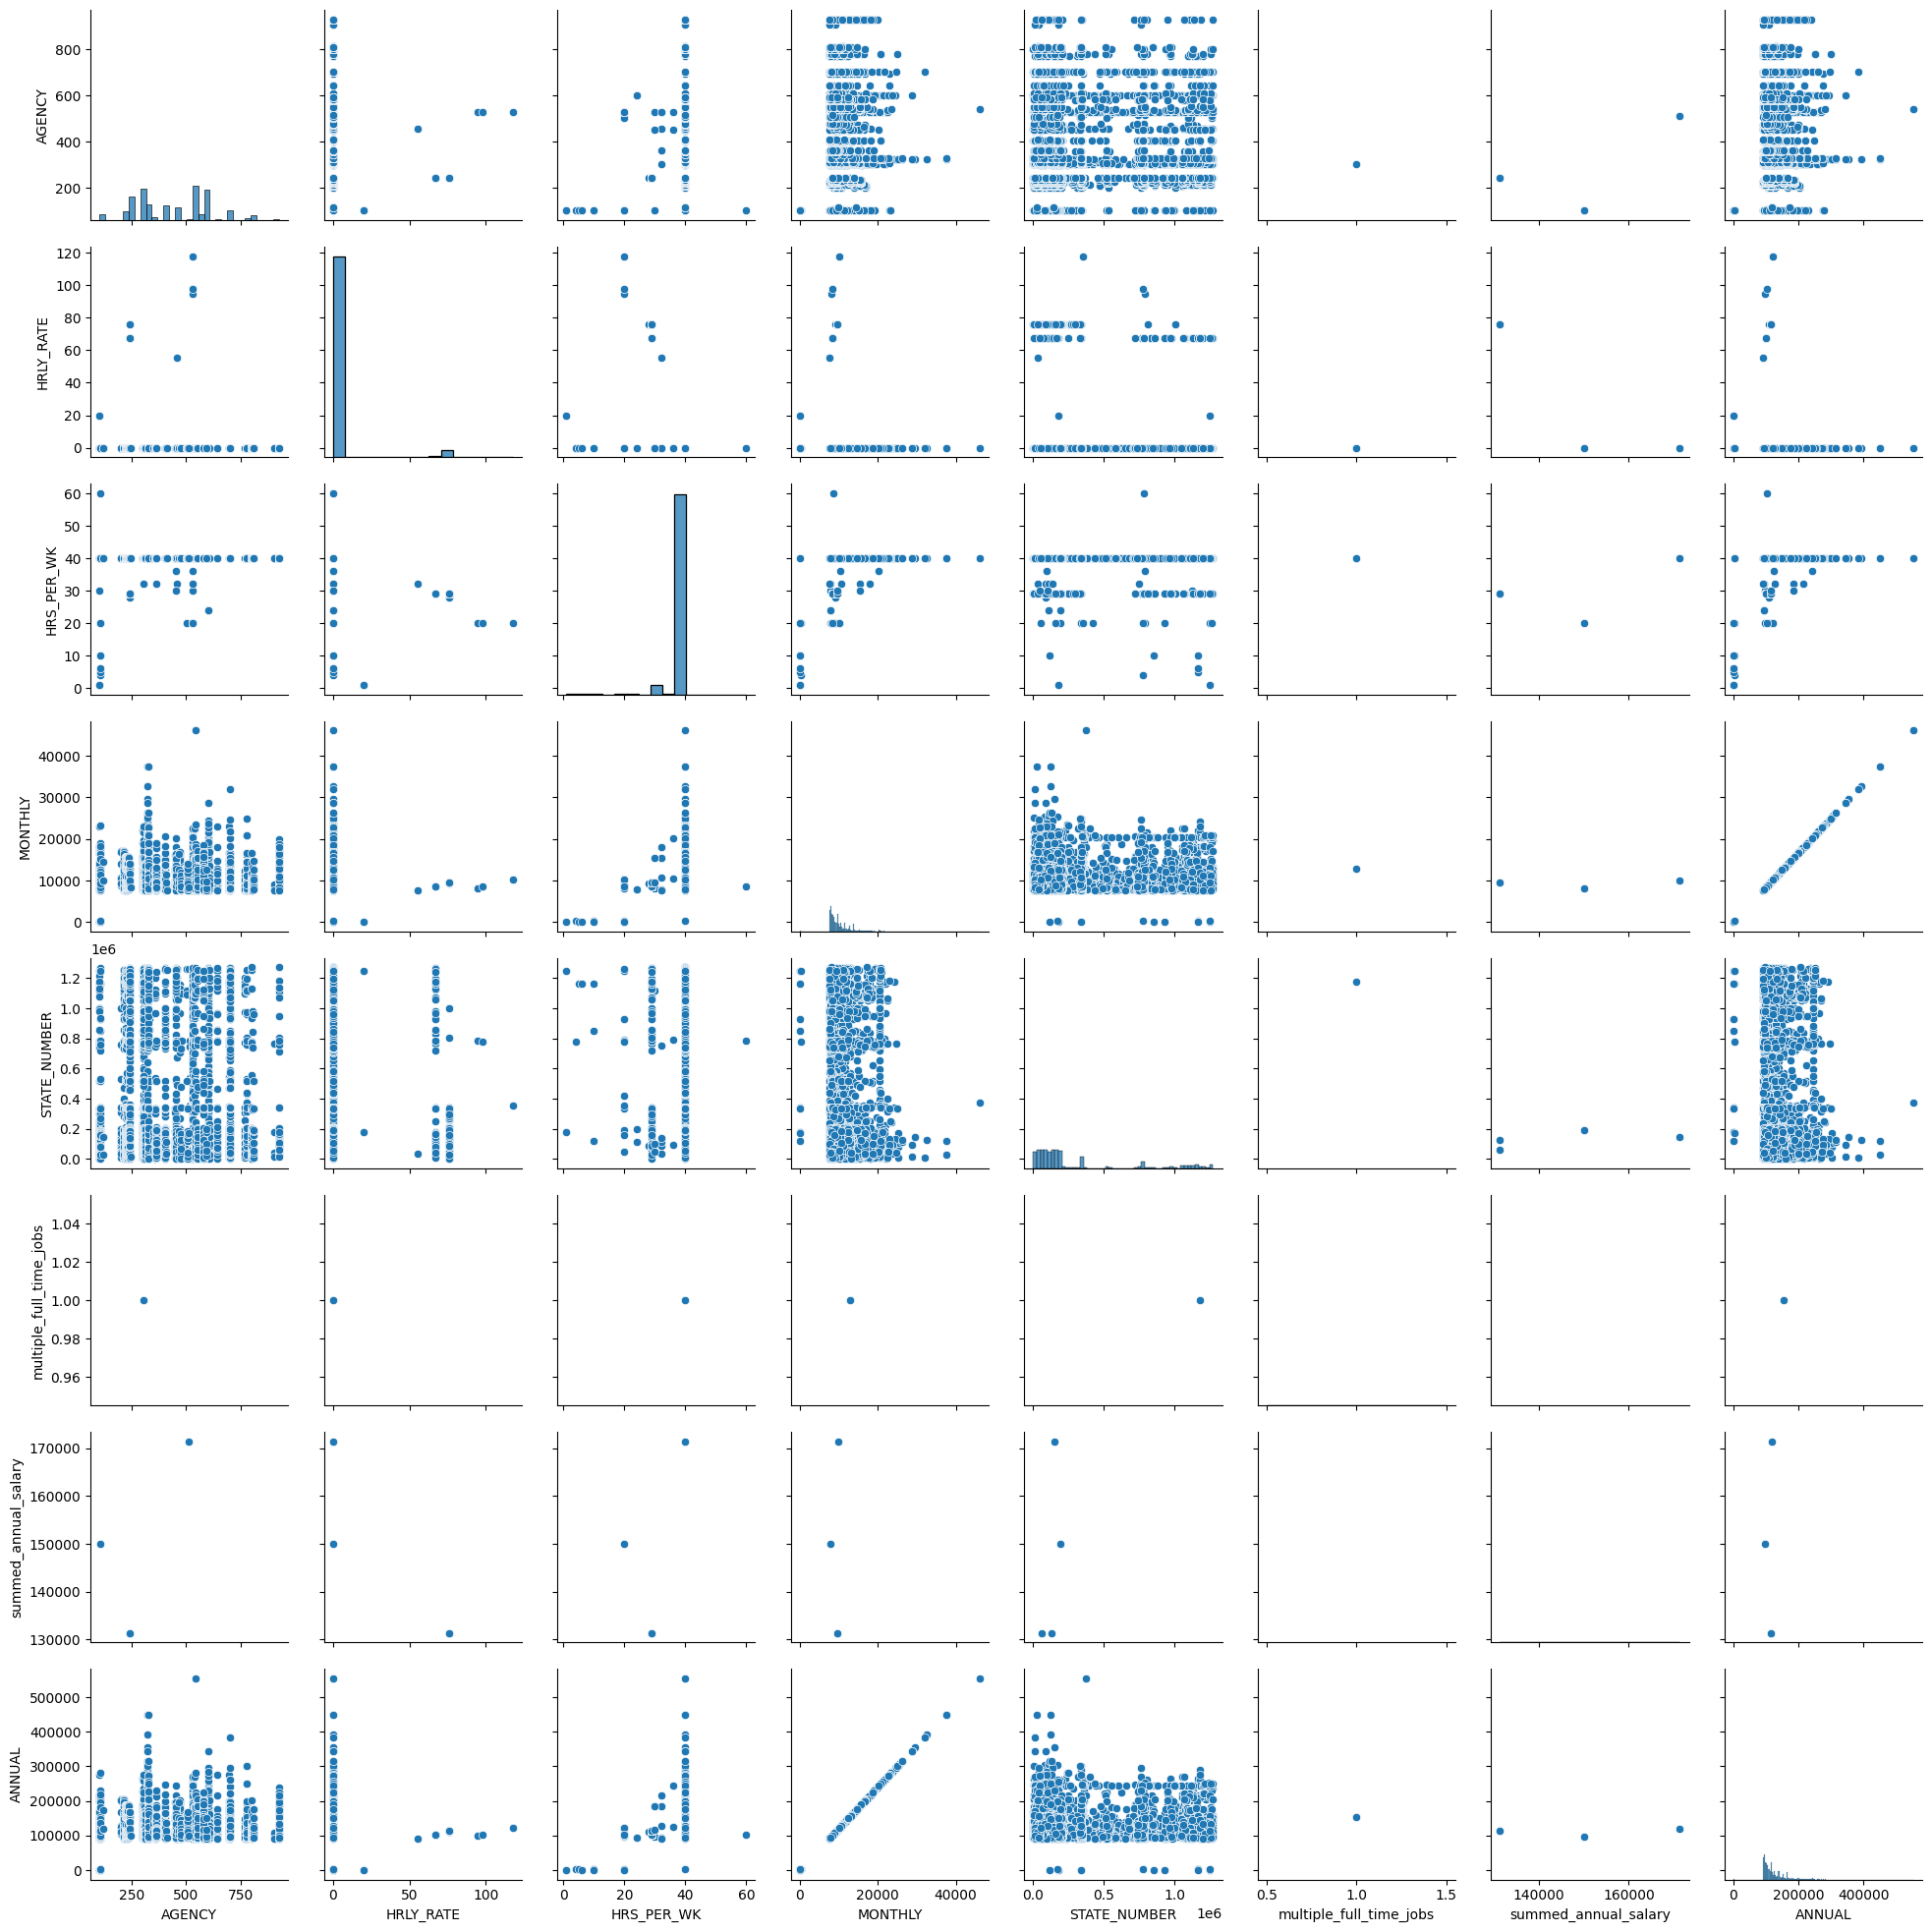

In [26]:
sns.pairplot(data=data1)
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 141394 to 149475
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGENCY                   9031 non-null   int64  
 1   AGENCY_NAME              9031 non-null   object 
 2   LAST NAME                9031 non-null   object 
 3   FIRST NAME               9031 non-null   object 
 4   MI                       9031 non-null   object 
 5   CLASS_CODE               9031 non-null   object 
 6   CLASS_TITLE              9031 non-null   object 
 7   ETHNICITY                9031 non-null   object 
 8   GENDER                   9031 non-null   object 
 9   STATUS                   9031 non-null   object 
 10  EMPLOY_DATE              9031 non-null   object 
 11  HRLY_RATE                9031 non-null   float64
 12  HRS_PER_WK               9031 non-null   float64
 13  MONTHLY                  9031 non-null   float64
 14  ANNUAL                

### Droping the unrelavent Columns 

In [28]:
data=df.drop(['AGENCY','LAST NAME','FIRST NAME','MI','CLASS_CODE','duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1)

In [29]:
data.isnull().sum()

AGENCY_NAME     0
CLASS_TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY_DATE     0
HRLY_RATE       0
HRS_PER_WK      0
MONTHLY         0
ANNUAL          0
STATE_NUMBER    0
dtype: int64

In [30]:
data=df.drop(['AGENCY','LAST NAME','FIRST NAME','MI','CLASS_CODE','MONTHLY','duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1)

In [31]:
data

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER
141394,SENATE ...,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,02/03/05,20.0,1.0,1039.92,176291
141415,SENATE ...,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,12/04/19,20.0,1.0,1039.92,1246122
141808,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,04/12/17,0.0,10.0,1200.00,118315
141809,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/08/19,0.0,10.0,2400.00,1164537
141897,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12/01/17,0.0,20.0,1200.00,338420
...,...,...,...,...,...,...,...,...,...,...
149374,STATE PRESERVATION BOARD ...,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/23/13,0.0,40.0,127000.08,336971
149393,STATE PRESERVATION BOARD ...,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/15/04,0.0,40.0,100300.92,9905
149401,STATE PRESERVATION BOARD ...,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/12/05,0.0,40.0,95000.04,38235
149415,STATE PRESERVATION BOARD ...,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,12/02/08,0.0,40.0,122257.08,52817


### This is useful for analyzing trends, grouping employees by hiring year, or calculating years of service.

In [32]:
from datetime import datetime as dt
data['EMPLOY_DATE'] = pd.to_datetime(data['EMPLOY_DATE'])
# add a column for Year
data['Year'] = data['EMPLOY_DATE'].dt.year

### Calculating the Start of the Current Year

In [33]:
import datetime as dt
data['cur_yr']=dt.datetime.combine(dt.date.today(), dt.datetime.min.time())


### calculates the number of years an employee has worked .

calculates the number of years an employee has worked by subtracting the employment date from the current year, converting the difference into days, and then dividing by 365 to express it in years

In [34]:
data['yrs']=((data.cur_yr)-(data.EMPLOY_DATE)).apply(lambda x: str(x).split(' ')[0]).apply(lambda x: int(x)/365)
## We are subtracting Current year with EMPLOY_DATE and applying it to lambda function to calculate years for each record.

In [35]:
data.yrs.max()

49.5972602739726

In [36]:
data.yrs.min()

-43.71780821917808

In [37]:
neg= data.loc[data['yrs']<0]
neg

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,Year,cur_yr,yrs
148921,SOIL AND WATER CONSERVATION BOARD ...,PROGRAM SPECIALIST VII ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2068-12-01,0.0,40.0,91900.92,96871,2068,2025-03-25,-43.717808


In [38]:
data.drop(neg.index,inplace=True)

In [39]:
data

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,Year,cur_yr,yrs
141394,SENATE ...,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,2005-02-03,20.0,1.0,1039.92,176291,2005,2025-03-25,20.150685
141415,SENATE ...,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,2019-12-04,20.0,1.0,1039.92,1246122,2019,2025-03-25,5.309589
141808,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-04-12,0.0,10.0,1200.00,118315,2017,2025-03-25,7.956164
141809,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2019-01-08,0.0,10.0,2400.00,1164537,2019,2025-03-25,6.213699
141897,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-12-01,0.0,20.0,1200.00,338420,2017,2025-03-25,7.317808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,STATE PRESERVATION BOARD ...,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2013-01-23,0.0,40.0,127000.08,336971,2013,2025-03-25,12.175342
149393,STATE PRESERVATION BOARD ...,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2004-03-15,0.0,40.0,100300.92,9905,2004,2025-03-25,21.041096
149401,STATE PRESERVATION BOARD ...,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2005-10-12,0.0,40.0,95000.04,38235,2005,2025-03-25,19.463014
149415,STATE PRESERVATION BOARD ...,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2008-12-02,0.0,40.0,122257.08,52817,2008,2025-03-25,16.320548


In [40]:
data.drop(['EMPLOY_DATE','Year','cur_yr'],inplace=True,axis=1)

In [41]:
data

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,yrs
141394,SENATE ...,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,20.0,1.0,1039.92,176291,20.150685
141415,SENATE ...,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,20.0,1.0,1039.92,1246122,5.309589
141808,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,0.0,10.0,1200.00,118315,7.956164
141809,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,0.0,10.0,2400.00,1164537,6.213699
141897,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,0.0,20.0,1200.00,338420,7.317808
...,...,...,...,...,...,...,...,...,...,...
149374,STATE PRESERVATION BOARD ...,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,127000.08,336971,12.175342
149393,STATE PRESERVATION BOARD ...,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,100300.92,9905,21.041096
149401,STATE PRESERVATION BOARD ...,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,95000.04,38235,19.463014
149415,STATE PRESERVATION BOARD ...,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,122257.08,52817,16.320548


### One-Hot encoding

In [42]:
data=pd.get_dummies(data,drop_first= False)
data

,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,yrs,AGENCY_NAME_ALCOHOLIC BEVERAGE COMMISSION,AGENCY_NAME_BOARD OF ARCHITECTURAL EXAMINERS,AGENCY_NAME_BOARD OF CHIROPRACTIC EXAMINERS,AGENCY_NAME_BOARD OF DENTAL EXAMINERS,AGENCY_NAME_BOARD OF NURSE EXAMINERS,...,GENDER_MALE,STATUS_CRF - CLASSIFIED REGULAR FULL-TIME,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
141394,20.0,1.0,1039.92,176291,20.150685,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
141415,20.0,1.0,1039.92,1246122,5.309589,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
141808,0.0,10.0,1200.00,118315,7.956164,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
141809,0.0,10.0,2400.00,1164537,6.213699,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
141897,0.0,20.0,1200.00,338420,7.317808,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,0.0,40.0,127000.08,336971,12.175342,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
149393,0.0,40.0,100300.92,9905,21.041096,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
149401,0.0,40.0,95000.04,38235,19.463014,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
149415,0.0,40.0,122257.08,52817,16.320548,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Implement the Train_Test_split

In [43]:
data.shape

(9030, 497)

In [44]:
X=data.drop(['ANNUAL'],axis=1)

In [45]:
y=data.ANNUAL

In [46]:
X.shape

(9030, 496)

In [47]:
y.shape

(9030,)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33)

In [49]:
X_train

,HRLY_RATE,HRS_PER_WK,STATE_NUMBER,yrs,AGENCY_NAME_ALCOHOLIC BEVERAGE COMMISSION,AGENCY_NAME_BOARD OF ARCHITECTURAL EXAMINERS,AGENCY_NAME_BOARD OF CHIROPRACTIC EXAMINERS,AGENCY_NAME_BOARD OF DENTAL EXAMINERS,AGENCY_NAME_BOARD OF NURSE EXAMINERS,AGENCY_NAME_BOARD OF PHARMACY,...,GENDER_MALE,STATUS_CRF - CLASSIFIED REGULAR FULL-TIME,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
975,0.0000,40.0,530666,5.065753,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
144888,0.0000,40.0,161071,15.364384,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2975,0.0000,40.0,48190,16.956164,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14876,0.0000,40.0,175396,16.457534,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
806,0.0000,40.0,91134,14.591781,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0000,40.0,188298,24.857534,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1376,75.9615,29.0,67249,30.249315,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
84042,0.0000,40.0,1252870,5.147945,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
8509,0.0000,40.0,104154,21.482192,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


###  Models Implementation

### LinearRegression

In [50]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_train) #y_predict is the model predicted output
y_train
y_predict
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_train,y_predict)
print("R² Score:", r2score)


R² Score: 0.904199630022385


### DecisionTreeRegression

In [51]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_test,predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("R² Score:", r2score)
print("Mean Absolute Error:", mae)

R² Score: 0.7863635499851758
Mean Absolute Error: 8605.428786536766


### RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators = 10,random_state = 0)
regressor.fit(X_train, y_train)
predictions = model.predict(X_test)
y_predict=regressor.predict(X_test)
r2score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("R² Score:", r2score)
print("Mean Absolute Error:", mae)

R² Score: 0.84312791562144
Mean Absolute Error: 8605.428786536766


### Lasso

In [53]:
from sklearn.linear_model import Lasso
# Initialize Lasso Regression Model
model = Lasso(alpha=0.1, random_state=44)  # Alpha controls regularization strength

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluation Metrics
r2score = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print Results
print("R² Score:", r2score)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


R² Score: 0.8543119137102129
Mean Squared Error: 183344694.4111308
Mean Absolute Error: 8044.431949552785


### Ridge

In [54]:
from sklearn.linear_model import Ridge
# Initialize Ridge Regression Model
model = Ridge(alpha=1.0, random_state=44)  # Alpha controls regularization strength

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluation Metrics
r2score = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print Results
print("R² Score:", r2score)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


R² Score: 0.8587001668906894
Mean Squared Error: 177822191.10380617
Mean Absolute Error: 8237.524832550882


###  Model Performance (R² Score):

Linear Regression → 90

Lasso Regression → 85

Ridge Regression → 86

Random Forest Regressor → 84

Decision Tree Regressor → 78

### Analysis & Suggestions:


Linear Regression performed the best (90%).

Ridge (86%) and Lasso (85%) are slightly lower than Linear Regression.
Ridge is slightly better than Lasso, meaning L2 regularization is more effective for your dataset than L1.

Random Forest (84%) performs slightly worse than Ridge/Lasso but effective.

Decision Tree (78%) is the weakest model, which suggests high variance.

### Challenges Faced

####  Data Quality Issues

1.Duplicated Entries (duplicated)-If duplicate salary records exist, these distort the model’s learning process.

2.Multiple Job Holders (multiple_full_time_jobs, combined_multiple_jobs, summed_annual_salary)-Some employees might have multiple jobs, leading to overestimated salaries.

3.Incorrect Data-HRLY RATE, HRS PER WK, MONTHLY, ANNUAL have incorrect values

#### Feature Engineering Challenges

1.Categorical Variables (AGENCY NAME, CLASS TITLE, ETHNICITY, GENDER, STATUS)-Many of these are non-numeric.Large categories like "AGENCY NAME" introduce high-dimensionality, causing overfitting.

2.Temporal Data (EMPLOY DATE)-The hiring date could be useful for experience estimation but must be converted properly.

3.Privacy Concerns (LAST NAME, FIRST NAME, MI)-These should not be used in the model, as they don’t influence salary predictions.

#### Model-Specific Challenges

1.Multicollinearity-Features like MONTHLY and ANNUAL are highly correlated. Including both distort the model.

2.Outliers in Salary (HRLY RATE, ANNUAL)-Extremely high/low salaries (CEOs vs. interns)  distort the model.

3.Non-Linearity -Linear models struggled the salary trends due to non-linear.   